# Read data

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/"

os.chdir(path)
os.listdir(path)

Mounted at /content/drive


['train2.csv', 'Colab Notebooks', 'avisassurance_test.csv']

In [ ]:
import pandas as pd
data=pd.read_csv("train2.csv",sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.head(10)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,datasplit,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,visits,hits,pageviews,bounces,newVisits,transactionRevenue,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,criteriaParameters,page,slot,gclId,adNetworkType,isVideoAd
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,train,(not set),google,organic,(not provided),NaN,NaN,NaN,1,1,1.0,1.0,1.0,NaN,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,train,(not set),google,organic,(not provided),NaN,NaN,NaN,1,1,1.0,1.0,1.0,NaN,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,train,(not set),google,organic,(not provided),NaN,NaN,NaN,1,1,1.0,1.0,1.0,NaN,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,train,(not set),google,organic,google + online,NaN,NaN,NaN,1,1,1.0,1.0,1.0,NaN,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available 

In [ ]:
data.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'datasplit', 'campaign', 'source', 'medium', 'keyword', 'isTrueDirect',
       'referralPath', 'adContent', 'visits', 'hits', 'pageviews', 'bounces',
       'newVisits', 'transactionRevenue', 'continent', 'subContinent',
       'country', 'region', 'metro', 'city', 'cityId', 'networkDomain',
       'latitude', 'longitude', 'networkLocation', 'browser', 'browserVersion',
       'browserSize', 'operatingSystem', 'operatingSystemVersion', 'isMobile',
       'mobileDeviceBranding', 'mobileDeviceModel', 'mobileInputSelector',
       'mobileDeviceInfo', 'mobileDeviceMarketingName', 'flashVersion',
       'language', 'screenColors', 'screenResolution', 'deviceCategory',
       'criteriaParameters', 'page', 'slot', 'gclId', 'adNetworkType',
       'isVideoAd'],
      dtype='object')

# Data processing

Check if there are columns with only one value

In [ ]:
discovering_consts = [col for col in data.columns if data[col].nunique() == 1]
# printing the total of columns dropped and the name of columns 
print("Columns with just one value: ", len(discovering_consts), "columns")
print("Name of constant columns: \n", discovering_consts)

Columns with just one value:  24 columns
Name of constant columns: 
 ['socialEngagementType', 'datasplit', 'isTrueDirect', 'visits', 'bounces', 'newVisits', 'cityId', 'latitude', 'longitude', 'networkLocation', 'browserVersion', 'browserSize', 'operatingSystemVersion', 'mobileDeviceBranding', 'mobileDeviceModel', 'mobileInputSelector', 'mobileDeviceInfo', 'mobileDeviceMarketingName', 'flashVersion', 'language', 'screenColors', 'screenResolution', 'criteriaParameters', 'isVideoAd']


So we decided to drop these feature from our data.

In [ ]:

delete=['socialEngagementType', 'datasplit', 'isTrueDirect', 'visits', 'bounces', 'newVisits', 'cityId', 'latitude', 'longitude', 'networkLocation', 'browserVersion', 'browserSize', 'operatingSystemVersion', 'mobileDeviceBranding', 'mobileDeviceModel', 'mobileInputSelector', 'mobileDeviceInfo', 'mobileDeviceMarketingName', 'flashVersion', 'language', 'screenColors', 'screenResolution', 'criteriaParameters', 'adNetworkType', 'isVideoAd']


In [ ]:
data=data.drop(delete,axis=1)

In [ ]:
data.head(10)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,campaign,source,medium,keyword,referralPath,adContent,hits,pageviews,transactionRevenue,continent,subContinent,country,region,metro,city,networkDomain,browser,operatingSystem,isMobile,deviceCategory,page,slot,gclId
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,(not set),google,organic,(not provided),NaN,NaN,1,1.0,NaN,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,Chrome,Windows,False,desktop,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,(not set),google,organic,(not provided),NaN,NaN,1,1.0,NaN,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,Firefox,Macintosh,False,desktop,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,(not set),google,organic,(not provided),NaN,NaN,1,1.0,NaN,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,unknown.unknown,Chrome,Windows,False,desktop,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,(not set),google,organic,google + online,NaN,NaN,1,1.0,NaN,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,UC Browser,Linux,False,desktop,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,(not set),google,organic,(not provided),NaN,NaN,1,1.0,NaN,Europe,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,Chrome,Android,True,mobile,NaN,NaN,NaN
5,Organic Search,20160902,2938943183656635653,2938943183656635653_1472807194,1472807194,1,1472807194,(not set),google,organic,(not provided),NaN,NaN,1,1.0,NaN,Europe,Southern Europe,Italy,not available in demo dataset,not available in demo dataset,not available in demo dataset,fastwebnet.it,Chrome,Windows,False,desktop,NaN,NaN,NaN
6,Organic Search,20160902,1905672039242460897,1905672039242460897_1472817241,1472817241,1,1472817241,(not set),google,organic,(not provided),NaN,NaN,1,1.0,NaN,Asia,Southern Asia,Pakistan,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,Chrome,Windows,False,desktop,NaN,NaN,NaN
7,Organic Search,20160902,537222803633850821,537222803633850821_1472812602,1472812602,1,1472812602,(not set),google,organic,(not provided),NaN,NaN,1,1.0,NaN,Oceania,Australasia,Australia,Queensland,(not set),Brisbane,bigpond.net.au,Chrome,Windows,False,desktop,NaN,NaN,NaN
8,Organic Search,20160902,4445454811831400414,4445454811831400414_1472805784,1472805784,1,1472805784,(not set),google,organic,(not provided),NaN,NaN,1,1.0,NaN,Europe,Western Europe,Austria,not available in demo dataset,not available in demo dataset,not available in demo dataset,spar.at,Internet Explorer,Windows,False,desktop,NaN,NaN,NaN
9,Organic Search,20160902,9499785259412240342,9499785259412240342_1472812272,1472812272,1,1472812272,(not set),google,organic,(not provided),NaN,NaN,1,1.0,NaN,Europe,Western Europe,Netherlands,not available in demo dataset,not available in demo dataset,not available in demo dataset,chello.nl,Firefox,Windows,False,desktop,NaN,NaN,NaN


Deal with the missing data

In [ ]:
data.isnull().sum().sort_values()

channelGrouping            0
region                     0
country                    0
subContinent               0
continent                  0
networkDomain              0
browser                    0
hits                       0
operatingSystem            0
isMobile                   0
deviceCategory             0
medium                     0
source                     0
campaign                   0
visitStartTime             0
visitNumber                0
visitId                    0
sessionId                  0
fullVisitorId              0
date                       0
metro                      0
city                       0
pageviews                100
keyword               502929
referralPath          572712
gclId                 882092
slot                  882193
page                  882193
transactionRevenue    892138
adContent             892707
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Percent missing data by feature')

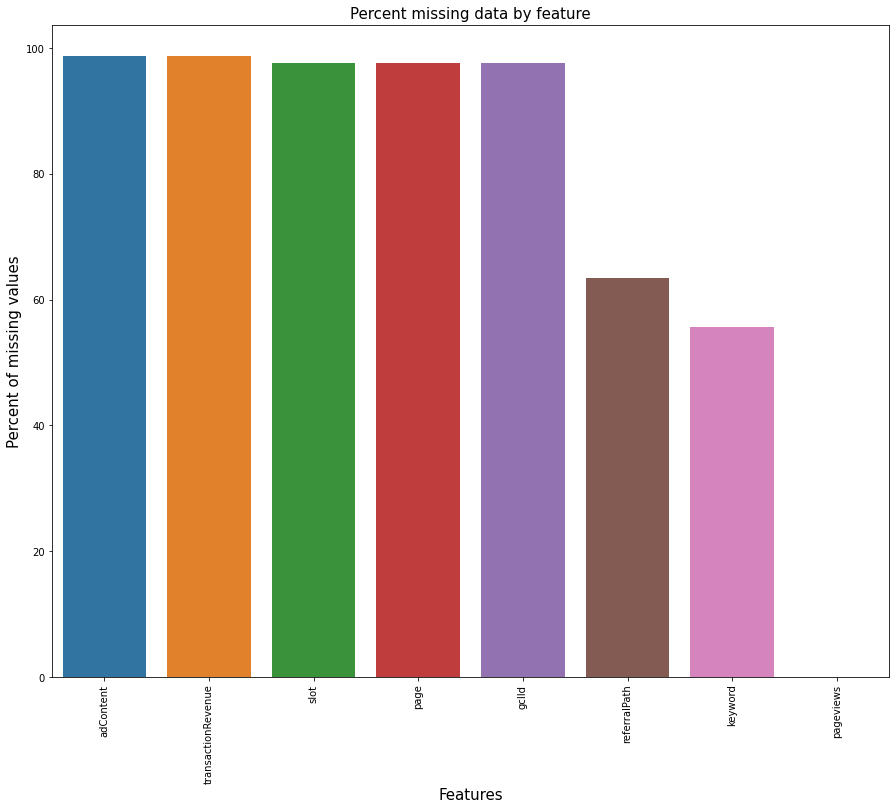

In [ ]:
# View missing values
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:10]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

# Draw a histogram of missing values
f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=data_na.index, y=data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [ ]:
data.deviceCategory.value_counts()

desktop    664479
mobile     208725
tablet      30449
Name: deviceCategory, dtype: int64

We can delete this data

In [ ]:
data.deviceCategory.isna()[data.deviceCategory.isna()==True]

Series([], Name: deviceCategory, dtype: bool)

In [ ]:
data=data.drop(index=[11817])

Deal with isMobile

In [ ]:
data.isMobile.value_counts()

False    664529
True     239123
Name: isMobile, dtype: int64

In [ ]:
data.isMobile.isna()[data.isMobile.isna()==True]

Series([], Name: isMobile, dtype: bool)

I think we have deleted before when we delete the missing data.

In [ ]:
data.keyword.value_counts()

(not provided)                     366363
6qEhsCssdK0z36ri                    11503
(Remarketing/Content targeting)      2298
1hZbAqLCbjwfgOH7                     2264
google merchandise store             2209
                                    ...  
buy youtube tshirt online               1
Google Tshirt                           1
google developer merchandise            1
singapore google store                  1
you tou e                               1
Name: keyword, Length: 3659, dtype: int64

This value is too messey,we decided to use the nlp method to deal with them.

In [ ]:
data.keyword=data.keyword.fillna("(not provided)")

In [ ]:
keywords=list(data.keyword.values)

In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
import re,string
from nltk.tokenize import TweetTokenizer
nltk.download('stopwords')
nltk.download('punkt')
tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
from nltk.stem import WordNetLemmatizer,PorterStemmer
lemmatizer_output=WordNetLemmatizer()
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
english_words = set(nltk.corpus.words.words())

def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    list_token=word_tokenize(tweet)
    tweets=[]
    for word in list_token:
      if word in english_words:
        tweets.append(word)

    return tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
for i in range(len(keywords)):
  keywords[i]=process_tweet(keywords[i])

In [ ]:
import nltk
vocabulary = nltk.FreqDist()
new_list=[]
for word in keywords:
    for i in word:
      new_list.append(i)
    vocabulary.update(word)
for word, frequency in vocabulary.most_common(30):
    print(f'{word};{frequency}')

not;11337
provided;11337
store;41
merchandise;31
shop;10
t;10
you;10
shirt;9
tube;9
content;8
automatic;8
matching;8
vertical;5
merch;4
lava;3
lamp;3
on;3
stickers;3
shopping;2
how;2
to;2
bag;2
free;2
for;2
buy;1
hood;1
pink;1
player;1
clothes;1
blue;1


It'is clear that the most frequence keyword is "merchandise" "store" "shop" "store"

In [ ]:
newkeywords=[]
for i in keywords:
  new=''
  for j in i:
    new=new+" "+j
  newkeywords.append(new)

In [ ]:
for i in range(len(data)):
  if newkeywords[i] =="":
    data.keyword[i]="unreadable"
  else:
    data.keyword[i]=newkeywords[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data.keyword.value_counts()

 not provided                       11337
unreadable                            353
 merchandise store                     25
 store                                 15
 content                                8
 automatic matching                     8
 shop                                   7
 t shirt                                5
 vertical                               5
 merch                                  4
 you tube                               3
 stickers                               3
 tube                                   3
 you                                    3
 shirt                                  2
 t                                      2
 merchandise                            2
 hood pink                              1
 bag                                    1
 jacket you tube                        1
 free                                   1
 address                                1
 on                                     1
 merchandise for                  

In [ ]:
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace
cnt_srs = data.groupby('keyword')['transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(58, 71, 80, 0.6)')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'rgba(58, 71, 80, 0.6)')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(58, 71, 80, 0.6)')

fig = make_subplots(rows=1, cols=3, vertical_spacing=0.04, 
                          subplot_titles=["Keyword - Count", "Keyword - Non-zero Revenue Count", "Keyword - Mean Revenue",
                                                    ])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Keywords Plots")
py.iplot(fig, filename='device-plots')
fig.show()

We can find that most of people who buy the things without the keywords,so we decided to delete this feature

In [ ]:
data=data.drop(['keyword'],axis=1)

Then,referralPath

In [ ]:
data.referralPath.value_counts()

/                                                                1104
/yt/about/                                                        706
/analytics/web/                                                   151
/yt/about/es-419/                                                 146
/yt/about/ru/                                                     131
                                                                 ... 
/intl/ru/permissions/using-the-logo.html                            1
/document/d/1_U0SrqFdOmykhZ1MdWyGEInX5ERDTQrg0171OSIqaWU/edit       1
/cm/CampaignMgmt                                                    1
/od/Things-To-Do-in-Silicon-Valley/fl/                              1
/intl/hi/permissions/using-the-logo.html                            1
Name: referralPath, Length: 210, dtype: int64

In [ ]:
data=data.drop(['referralPath'],axis=1)

In [ ]:
data.transactionRevenue.value_counts()

16990000.0     3
13590000.0     2
44790000.0     2
24990000.0     2
30390000.0     2
              ..
35320000.0     1
166420000.0    1
106260000.0    1
179160000.0    1
111160000.0    1
Name: transactionRevenue, Length: 156, dtype: int64

Missing value here means no transaction revenue,so we fill with 0.

In [ ]:
data.transactionRevenue=data.transactionRevenue.fillna(0)

In [ ]:
data.adContent.value_counts()

Google Merchandise Collection       70
Full auto ad IMAGE ONLY             18
Ad from 12/13/16                    15
Display Ad created 3/11/15          10
Display Ad created 3/11/14          10
Google Online Store                 10
Ad from 11/3/16                      5
{KeyWord:Want Google Stickers?}      3
Ad from 11/7/16                      3
First Full Auto Template Test Ad     3
{KeyWord:Google Brand Items}         2
{KeyWord:Google Branded Gear}        1
{KeyWord:Google Merchandise}         1
{KeyWord:Google Men's T-Shirts}      1
{KeyWord:Google Drinkware}           1
{KeyWord:Google Branded Apparel}     1
Display Ad created 11/17/14          1
Name: adContent, dtype: int64

We can translate this columne to "haveAd",which means,if this People have looked the Ad

In [ ]:
data.adContent=data.adContent.fillna(0)
def change(a):
  if type(a) is int:
    return False
  else:
    return True
data['haveAd']=data.apply(lambda x:change(x['adContent']),axis=1)
data['haveAd'].value_counts()
data=data.drop(['adContent'],axis=1)

In [ ]:
data.gclId.value_counts()

Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRLIyC4WoAABLm_mr4SI2fyuPXhlC4kX2y46BYNULOMoaAjKw8P8HAQ      3
CjwKEAjw-LLKBRCdhqmwtYmX93kSJAAORDM6K_vERGGpVExrh9ITmLoG1Ac8SdTNfUUUAU_WteWWUxoCKHrw_wcB        3
Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRH-5Tu9PGZis9p-f_ogVLZzGImPNU92yFNBEREikqg8aAkEy8P8HAQ      2
CjwKEAiA2abEBRCdx7PqqunM1CYSJABf3qvaYo-gemeP401G6Cx2w8d0nbyvgnl7eNqwFbakIctcnxoCOAvw_wcB        2
COThldqn0dICFVuBswodwK0P5A                                                                      2
                                                                                               ..
Cj0KCQiAgJTGBRDLARIsACMWgOLLZaCafhcRHKx_lmiKN4Uqb1Ya_SLoRqCj_JnPntfUFEffQ4EtEHMaApciEALw_wcB    1
Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRJtPPaiEqg8jzbA1mqp1uSM4c90Mj6Q-nlgex9sXwIoaAlQO8P8HAQ      1
CKP_2ar81NQCFc26wAodGrIOMA                                                                      1
Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRGJKiDZWo9lxaiTgOivHRIsCM0VGoDxlpWqY4_aaPAUaAmRy8P8HAQ      1
CjwKEAiA2abEBRCdx7Pq

It is really a really messy feature,we decide to delete.

In [ ]:
data=data.drop(['gclId'],axis=1)

In [ ]:
data.page.value_counts()

1.0    282
5.0      2
Name: page, dtype: int64

In [ ]:
data.slot.value_counts()

Top    281
RHS      3
Name: slot, dtype: int64

These two feature we also decided to delete.

In [ ]:
data=data.drop(['page','slot'],axis=1)

In [ ]:
data.isnull().sum().sort_values()

channelGrouping       0
isMobile              0
operatingSystem       0
browser               0
networkDomain         0
city                  0
metro                 0
region                0
country               0
subContinent          0
continent             0
deviceCategory        0
transactionRevenue    0
hits                  0
medium                0
source                0
campaign              0
visitStartTime        0
visitNumber           0
visitId               0
sessionId             0
fullVisitorId         0
date                  0
pageviews             0
haveAd                0
dtype: int64

Change the type of date

In [ ]:
import datetime
data["date"] = pd.to_datetime(data["date"],format="%Y%m%d")
data["visitStartTime"] = pd.to_datetime(data["visitStartTime"],unit='s')

## Data visualization

The distribution of the Revenue

Transaction Revenue Min Value:  1990000.0
Transaction Revenue Mean Value:  137365090.9090909
Transaction Revenue Median Value:  57580000.0
Transaction Revenue Max Value:  1188550000.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



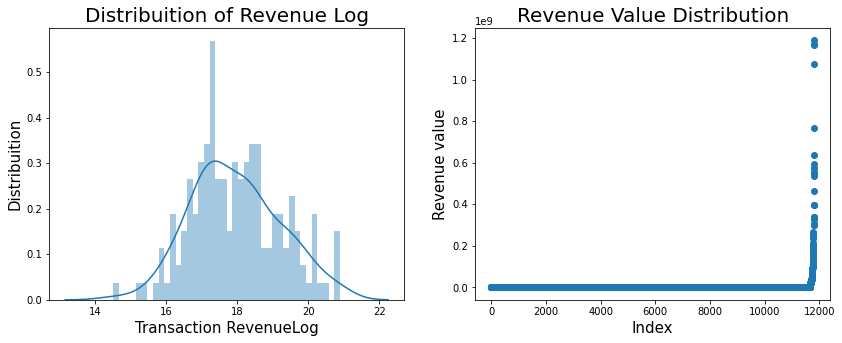

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Printing some statistics of our data
print("Transaction Revenue Min Value: ", 
      data[data['transactionRevenue'] > 0]["transactionRevenue"].min()) # printing the min value
print("Transaction Revenue Mean Value: ", 
      data[data['transactionRevenue'] > 0]["transactionRevenue"].mean()) # mean value
print("Transaction Revenue Median Value: ", 
      data[data['transactionRevenue'] > 0]["transactionRevenue"].median()) # median value
print("Transaction Revenue Max Value: ", 
      data[data['transactionRevenue'] > 0]["transactionRevenue"].max()) # the max value


plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.distplot(np.log(data[data['transactionRevenue'] > 0]["transactionRevenue"] + 0.01), bins=40, kde=True)
ax.set_xlabel('Transaction RevenueLog', fontsize=15) #seting the xlabel and size of font
ax.set_ylabel('Distribuition', fontsize=15) #seting the ylabel and size of font
ax.set_title("Distribuition of Revenue Log", fontsize=20) #seting the title and size of font

# setting the second plot of our grid of graphs
plt.subplot(1,2,2)
# ordering the total of users and seting the values of transactions to understanding 
plt.scatter(range(data.shape[0]), np.sort(data['transactionRevenue'].values))
plt.xlabel('Index', fontsize=15) # xlabel and size of words
plt.ylabel('Revenue value', fontsize=15) # ylabel and size of words
plt.title("Revenue Value Distribution", fontsize=20) # Setting Title and fontsize

plt.show()

Nice distribuition... We have very high values on the Transactions Revenue.


Device browsers
The top 10 of browsers represente of % total

Percentual of Browser usage: 
YaBrowser             0.262334
Safari (in-app)       0.575442
Opera Mini            0.744690
Opera                 0.846238
Android Webview       1.091648
Edge                  1.430143
Internet Explorer     2.538715
Firefox               4.832022
Safari               17.229415
Chrome               69.831599
Name: browser, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



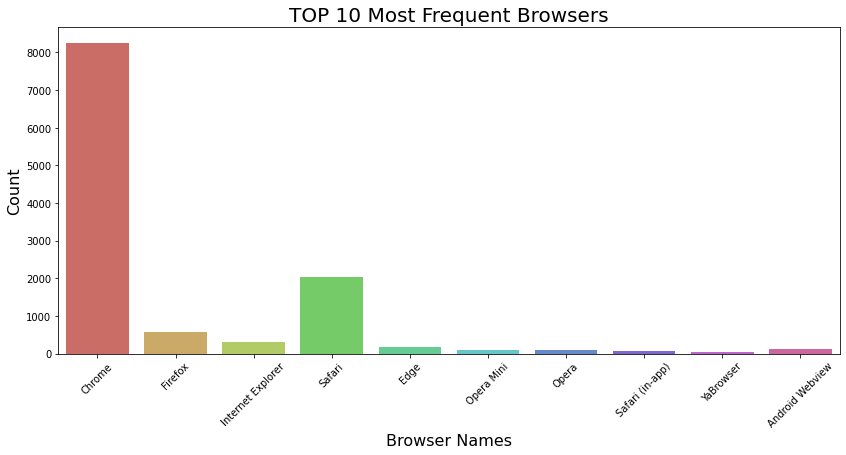

In [ ]:
# the top 10 of browsers represent % of total
print("Percentual of Browser usage: ")
print(data['browser'].value_counts().sort_values()[-10:]/len(data)*100 ) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,6))

# Let explore the browser used by users
sns.countplot(data[data['browser'].isin(data['browser'].value_counts().sort_values()[-10:].index.values)]['browser']
, palette="hls") # It's a module to count the category's
plt.title("TOP 10 Most Frequent Browsers", fontsize=20) # Adding Title and seting the size
plt.xlabel("Browser Names", fontsize=16) # Adding x label and seting the size
plt.ylabel("Count", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above


In our top 5 browsers we have more than 94% of total

TOP 1 - CHROME - 69,83%
TOP 2 - SAFARI - 17,22%
TOP 3 - FIREFOX - 5,83%

Device Information:

In [ ]:
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.graph_objs as go


In [ ]:
def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Device Browser
cnt_srs = data.groupby('browser')['transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(50, 171, 96, 0.6)')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'rgba(50, 171, 96, 0.6)')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(50, 171, 96, 0.6)')

# Device Category
cnt_srs = data.groupby('deviceCategory')['transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(71, 58, 131, 0.8)')
trace5 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'rgba(71, 58, 131, 0.8)')
trace6 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(71, 58, 131, 0.8)')

# Operating system
cnt_srs = data.groupby('operatingSystem')['transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace7 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(246, 78, 139, 0.6)')
trace8 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10),'rgba(246, 78, 139, 0.6)')
trace9 = horizontal_bar_chart(cnt_srs["mean"].head(10),'rgba(246, 78, 139, 0.6)')

# Creating two subplots
fig = make_subplots(rows=3, cols=3, vertical_spacing=0.04, 
                          subplot_titles=["Device Browser - Count", "Device Browser - Non-zero Revenue Count", "Device Browser - Mean Revenue",
                                          "Device Category - Count",  "Device Category - Non-zero Revenue Count", "Device Category - Mean Revenue", 
                                          "Device OS - Count", "Device OS - Non-zero Revenue Count", "Device OS - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)
fig.append_trace(trace9, 3, 3)

fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Device Plots")
py.iplot(fig, filename='device-plots')
fig.show()


Inferences:

* Device browser distribution looks 
similar on both the count and count of non-zero revenue plots On the device category front, desktop seem to have higher percentage of non-zero revenue counts compared to mobile devices. 
* In device operating system, though the number of counts is more from windows, the number of counts where revenue is not zero is more for Macintosh. 
* Chrome OS also has higher percentage of non-zero revenue counts On the mobile OS side, iOS has more percentage of non-zero revenue counts compared to Android


Crossing Channel Grouping x Browsers

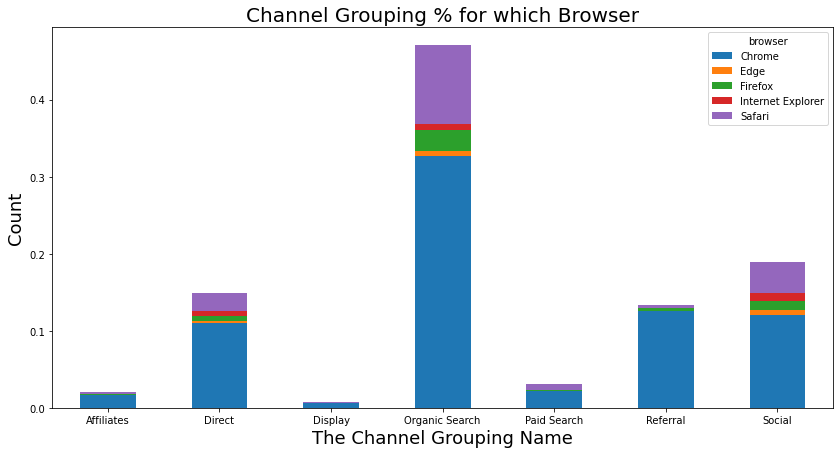

In [ ]:
## I will use the crosstab to explore two categorical values

# At index I will use set my variable that I want analyse and cross by another
crosstab_eda = pd.crosstab(index=data['channelGrouping'], normalize=True,
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns= data[data['browser'].isin(data['browser']\
                                                                            .value_counts()[:5].index.values)]['browser'])
# Ploting the crosstab that we did above
crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(14,7), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("Channel Grouping % for which Browser", fontsize=20) # seting the title size
plt.xlabel("The Channel Grouping Name", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size
plt.xticks(rotation=0)
plt.show() # rendering

The people who choose Organic Search use Safari

Operational System


Percentual of Operational System: 
Windows      4730
Macintosh    2882
Android      1701
iOS          1496
Linux         541
Name: operatingSystem, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



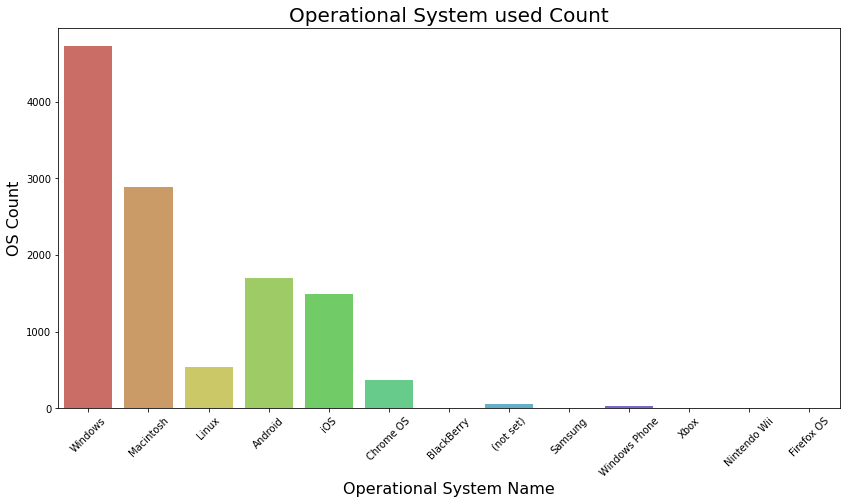

In [ ]:
# the top 5 of browsers represent % of total
print("Percentual of Operational System: ")
print(data['operatingSystem'].value_counts()[:5]) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,7))

# let explore the browser used by users
sns.countplot(data["operatingSystem"], palette="hls") # It's a module to count the category's
plt.title("Operational System used Count", fontsize=20) # seting the title size
plt.xlabel("Operational System Name", fontsize=16) # seting the x label size
plt.ylabel("OS Count", fontsize=16) # seting the y label size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show()

The TOP 5 of Operational System corresponds to 96%.

* TOP 1 => Windows - 38.75% 
* TOP 2 => Macintosh - 28.04% 
* TOP 3 => Android - 14.15% 
* TOP 4 => iOS - 11.75% 
* TOP 5 => Linux - 3.91% 

It's very interestign to me. In my country macbook isn't the most common SO. I will investigate further the SO by Country's

Geography plots

In [ ]:
from plotly.offline import init_notebook_mode, iplot, plot 
import plotly.graph_objs as go 

In [ ]:
# Counting total visits by countrys
countMaps = pd.DataFrame(data['country'].value_counts()).reset_index()
countMaps.columns=['country', 'counts'] #renaming columns
countMaps = countMaps.reset_index().drop('index', axis=1) #reseting index and droping the column

geo_data = [ dict(
        type = 'choropleth',
        locations = countMaps['country'],
        locationmode = 'country names',
        z = countMaps['counts'],
        text = countMaps['country'],
        autocolorscale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Number of Visits'),
      ) ]

layout = dict(
    title = 'Couting Visits Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

figure = dict( data=geo_data, layout=layout )
iplot(figure, validate=False, filename='map-countrys-count')

Most visit and Revenue is from America

In [ ]:
# Continent
cnt_srs = data.groupby('continent')['transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(58, 71, 80, 0.6)')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'rgba(58, 71, 80, 0.6)')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(58, 71, 80, 0.6)')

# Sub-continent
cnt_srs = data.groupby('subContinent')['transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(cnt_srs["count"], 'orange')
trace5 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"], 'orange')
trace6 = horizontal_bar_chart(cnt_srs["mean"], 'orange')


# Creating two subplots
fig = make_subplots(rows=2, cols=3, vertical_spacing=0.08, horizontal_spacing=0.15, 
                          subplot_titles=["Continent - Count", "Continent - Non-zero Revenue Count", "Continent - Mean Revenue",
                                          "Sub Continent - Count",  "Sub Continent - Non-zero Revenue Count", "Sub Continent - Mean Revenue",
                                          ])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)

fig['layout'].update(height=1500, width=1200, paper_bgcolor='rgb(233,233,233)', title="Geography Plots")
py.iplot(fig, filename='geo-plots')
fig.show()

Inferences:
On the continent plot, we can see that America has both higher number of counts as well as highest number of counts where the revenue is non-zero
Though Asia and Europe has high number of counts, the number of non-zero revenue counts from these continents are comparatively low.
We can infer the first two points from the sub-continents plot too.
If the network domain is "unknown.unknown" rather than "(not set)", then the number of counts with non-zero revenue tend to be lower.

Date exploration

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



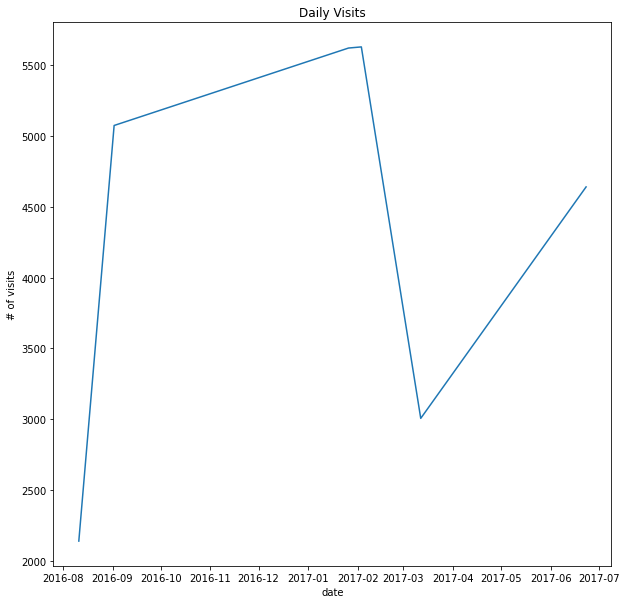

In [ ]:
visit_datetime_df = data[["date","visitNumber"]]
visit_datetime_df["visitNumber"] = visit_datetime_df.visitNumber.astype(np.int64)

daily_visit_df = visit_datetime_df.groupby(by=["date"], axis = 0).sum()

fig, axes = plt.subplots(1,1,figsize=(10,10))
axes.set_ylabel("# of visits")
axes.set_xlabel("date")
axes.set_title("Daily Visits")
axes.plot(daily_visit_df["visitNumber"])

2017-02 is the month with biggest visit

In [ ]:
import collections

tmp_least_10_visitNumbers_list = collections.Counter(list(data.visitNumber)).most_common()[:-10-1:-1]
tmp_most_10_visitNumbers_list = collections.Counter(list(data.visitNumber)).most_common(10)
least_visitNumbers = []
most_visitNumbers = []
for i in tmp_least_10_visitNumbers_list:
    least_visitNumbers.append(i[0])
for i in tmp_most_10_visitNumbers_list:
    most_visitNumbers.append(i[0])
"10 most_common visitNumbers are {} times and 10 least_common visitNumbers are {} times".format(most_visitNumbers,least_visitNumbers)

'10 most_common visitNumbers are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] times and 10 least_common visitNumbers are [77, 76, 90, 235, 162, 72, 236, 36, 195, 108] times'

In [ ]:
repetitive_users=data.fullVisitorId.value_counts().sort_values()
repetitive_users[repetitive_users>1].value_counts()/len(data)*100

2    5.407464
3    0.676991
4    0.220022
5    0.059237
6    0.025387
7    0.016925
8    0.008462
Name: fullVisitorId, dtype: float64

In [ ]:
sum(repetitive_users[repetitive_users>1].value_counts()/len(data)*100)

6.414487602606415

There is only 6.4% people visited the website more than once.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



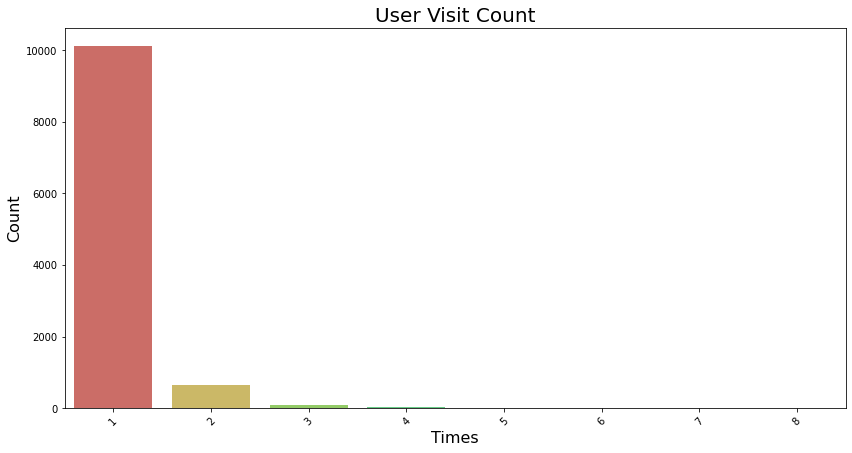

In [ ]:
# seting the graph size
plt.figure(figsize=(14,7))

# let explore the browser used by users
sns.countplot(repetitive_users, palette="hls") # It's a module to count the category's
plt.title("User Visit Count", fontsize=20) # seting the title size
plt.xlabel("Times", fontsize=16) # seting the x label size
plt.ylabel("Count", fontsize=16) # seting the y label size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #u

([<matplotlib.patches.Wedge at 0x7f01cfc45b10>,
 [Text(-0.8455553632921555, -0.7035880382779905, 'isNotMobile'),
  Text(0.922424032682352, 0.7675505872123528, 'isMobile')],
 [Text(-0.4612120163411757, -0.3837752936061766, '72.1%'),
  Text(0.5380806857313719, 0.44773784254053905, '27.9%')])

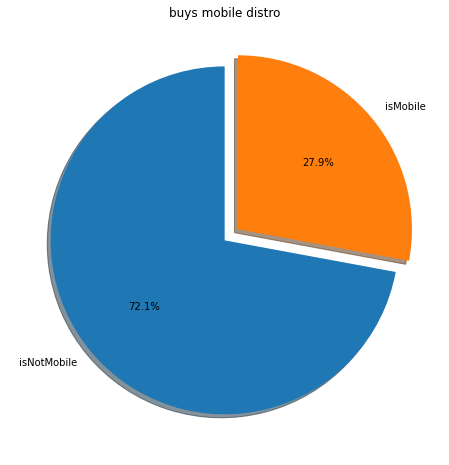

In [ ]:
revenue_os_df = data[['isMobile','transactionRevenue']]
buys_is_mobile_dict = dict(collections.Counter(list(revenue_os_df.isMobile)))
percent_buys_is_mobile_dict = {k: v / total for total in (sum(buys_is_mobile_dict.values()),) for k, v in buys_is_mobile_dict.items()}
sizes = list(percent_buys_is_mobile_dict.values())
explode=(0,0.1)
labels = 'isNotMobile', 'isMobile'
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_title("buys mobile distro")
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

## FeatureFeature engenerning

In [ ]:
data.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'campaign', 'source', 'medium', 'hits',
       'pageviews', 'transactionRevenue', 'continent', 'subContinent',
       'country', 'region', 'metro', 'city', 'networkDomain', 'browser',
       'operatingSystem', 'isMobile', 'deviceCategory', 'haveAd'],
      dtype='object')

In [ ]:
data.date.value_counts()

2016-09-02    2613
2017-01-26    2209
2017-02-03    2182
2017-06-23    2095
2017-03-12    1781
2016-08-11     937
Name: date, dtype: int64

This data is only recorded for 6 different days, not continuous, so we choose to delete.

In [ ]:
data=data.drop(["date"],axis=1)

And we will split the start time to morning and evening,we popose this start time have been recorded after calculate the time difference between each country.

if start time is between [07-22],we think this customer is visit in days,
else,we think he visit in evening.
 

In [ ]:
data.visitStartTime

0       2016-09-02 15:33:05
1       2016-09-03 05:22:27
2       2016-09-03 01:16:26
3       2016-09-03 05:40:13
4       2016-09-02 13:23:20
                ...        
11812   2016-08-11 13:09:43
11813   2016-08-11 09:40:59
11814   2016-08-12 00:12:23
11815   2016-08-12 04:07:30
11816   2016-08-11 16:37:39
Name: visitStartTime, Length: 11817, dtype: datetime64[ns]

In [ ]:
def to_time(a):
  if a.hour>=7 and a.hour<22:
    return 0
  else:
    return 1

In [ ]:
data.visitStartTimes=data.apply(lambda a: to_time(a['visitStartTime']),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
data=data.drop(['visitStartTime'],axis=1)

In [ ]:
print(data.groupby('fullVisitorId').size()[data.groupby('fullVisitorId').size()>1])

fullVisitorId
696790665307308        2
2679318298754771       3
5096736076850458       2
11894735283045088      2
23492254041848868      2
                      ..
9934691400598433911    2
9936086993632712670    2
9941821419294775713    3
9952689481314216086    2
9960353142606371996    2
Length: 758, dtype: int64


In [ ]:
print(data.groupby('sessionId').size()[data.groupby('sessionId').size()>1])

Series([], dtype: int64)


In [ ]:
print(data.groupby('visitId').size()[data.groupby('visitId').size()>1])

visitId
1470902396    2
1470955217    2
1470957870    2
1472799711    2
1472801040    2
             ..
1498274520    2
1498275398    2
1498275559    2
1498275804    2
1498286968    2
Length: 178, dtype: int64


In [ ]:
data[data.visitId==1470902396]

,channelGrouping,fullVisitorId,sessionId,visitId,visitNumber,campaign,source,medium,hits,pageviews,transactionRevenue,continent,subContinent,country,region,metro,city,networkDomain,browser,operatingSystem,isMobile,deviceCategory,haveAd
11540,Organic Search,4063976231400278013,4063976231400278013_1470902396,1470902396,1,(not set),google,organic,1,1,0.0,Europe,Western Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,vodafone.de,Firefox,Windows,False,desktop,False
11809,Social,5172476279408122800,5172476279408122800_1470902396,1470902396,1,(not set),youtube.com,referral,1,1,0.0,Asia,Eastern Asia,Japan,not available in demo dataset,not available in demo dataset,not available in demo dataset,ocn.ne.jp,Firefox,Windows,False,desktop,False


And we popose the id of the customers can't influence the Transtction Revenue;each people have the same desire to buy.

In [ ]:
data=data.drop(["fullVisitorId","sessionId","visitId"],axis=1)

In [ ]:
data.dtypes[data.dtypes=='object'].index

Index(['channelGrouping', 'campaign', 'source', 'medium', 'continent',
       'subContinent', 'country', 'region', 'metro', 'city', 'networkDomain',
       'browser', 'operatingSystem', 'isMobile', 'deviceCategory'],
      dtype='object')

In [ ]:
data.channelGrouping.value_counts()

Organic Search    5451
Social            2372
Direct            1802
Referral          1518
Paid Search        352
Affiliates         239
Display             83
Name: channelGrouping, dtype: int64

In [ ]:
data.campaign.value_counts()

(not set)                                          11283
Data Share Promo                                     239
AW - Dynamic Search Ads Whole Site                   194
AW - Accessories                                      87
test-liyuhz                                           10
AW - Apparel                                           2
Retail (DO NOT EDIT owners nophakun and tianyu)        1
AW - Electronics                                       1
Name: campaign, dtype: int64

In [ ]:
data.source.value_counts()

google                       5741
youtube.com                  2233
(direct)                     1802
mall.googleplex.com          1027
Partners                      239
                             ... 
awics.corp.google.com           1
connect.googleforwork.com       1
tpc.googlesyndication.com       1
outlook.live.com                1
google.com.pk                   1
Name: source, Length: 76, dtype: int64

In [ ]:
data.medium.value_counts()

organic      5451
referral     3890
(none)       1802
cpc           352
affiliate     239
cpm            83
Name: medium, dtype: int64

In [ ]:
data.isMobile.value_counts()

False    8519
True     3298
Name: isMobile, dtype: int64

In [ ]:
def to_mobile(a):
  if a=="False":
    return 0
  else:
    return 1
data.isMobile=data.apply(lambda a: to_mobile(a['isMobile']),axis=1)

In [ ]:
def to_ad(a):
  if a=="False":
    return 0
  else:
    return 1
data.haveAd=data.apply(lambda a: to_ad(a['haveAd']),axis=1)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
newdata=pd.get_dummies(data)

In [ ]:
newdata.head(1)

,visitNumber,hits,pageviews,transactionRevenue,isMobile,haveAd,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,campaign_(not set),campaign_AW - Accessories,campaign_AW - Apparel,campaign_AW - Dynamic Search Ads Whole Site,campaign_AW - Electronics,campaign_Data Share Promo,campaign_Retail (DO NOT EDIT owners nophakun and tianyu),campaign_test-liyuhz,source_(direct),source_0.shared.bow.cat2.ads-bow.qk.borg.google.com:9801,source_0.shared.bow.cat2.ads-bow.vu.borg.google.com:9856,source_Partners,source_analytics.google.com,source_aol,source_arstechnica.com,source_ask,source_aulagrado.esic.edu,source_awics.corp.google.com,source_baidu,source_bing,source_blog.golang.org,source_businessinsider.com,source_connect.googleforwork.com,source_course.fso.fullsail.edu,source_cv.il3.ub.edu,source_dealspotr.com,source_dfa,...,networkDomain_zxonlinebd.com,browser_ADM,browser_Amazon Silk,browser_Android Browser,browser_Android Webview,browser_BlackBerry,browser_Chrome,browser_Coc Coc,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Lunascape,browser_MRCHROME,browser_Maxthon,browser_Mozilla Compatible Agent,browser_Nintendo Browser,browser_Nokia Browser,browser_Opera,browser_Opera Mini,browser_Puffin,browser_Safari,browser_Safari (in-app),browser_UC Browser,browser_YaBrowser,operatingSystem_(not set),operatingSystem_Android,operatingSystem_BlackBerry,operatingSystem_Chrome OS,operatingSystem_Firefox OS,operatingSystem_Linux,operatingSystem_Macintosh,operatingSystem_Nintendo Wii,operatingSystem_Samsung,operatingSystem_Windows,operatingSystem_Windows Phone,operatingSystem_Xbox,operatingSystem_iOS,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet
0,1,1,1,0.0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
regression_data=newdata.copy()

In [ ]:
def to_revenue(a):
  if a>0:
    return 1
  else:
    return 0
newdata.transactionRevenue=newdata.apply(lambda a: to_revenue(a['transactionRevenue']),axis=1)

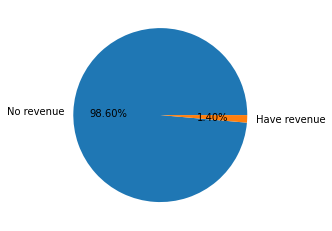

In [ ]:
counts =newdata.transactionRevenue.value_counts()
plt.pie(x = counts, labels=pd.Series(counts.index).map({1:'Have revenue',0:'No revenue'}),autopct='%.2f%%')
plt.show()

## Model

### Classification

We have decided to do the classification for this case.But we found that,two classification aren't balanced.It can be considered that the two types of customers are out of balance. If you directly model such data, the results of the model may not be accurate enough. You might as well build a random forest model for the data first to see if there is any bias.



In [ ]:
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [ ]:
data=newdata.copy()

In [ ]:
from sklearn.preprocessing import RobustScaler
predictors = data.drop(['transactionRevenue'],axis=1).columns
X_train,X_test,y_train,y_test = model_selection.train_test_split(data[predictors], newdata.transactionRevenue, random_state=12)
scaler = RobustScaler()
X_train = scaler.fit(X_train).transform(X_train)  #训练样本特征归一化
X_test = scaler.transform(X_test)                 #测试集样本特征归一化  

dt = tree.DecisionTreeClassifier() 
dt.fit(X_train,y_train)
pred = dt.predict(X_test)

print(metrics.accuracy_score(y_test, pred))
print(metrics.classification_report(y_test, pred))

0.9769881556683587
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2906
           1       0.24      0.18      0.21        49

    accuracy                           0.98      2955
   macro avg       0.61      0.59      0.60      2955
weighted avg       0.97      0.98      0.98      2955



As shown in the above results, the prediction accuracy rate of the decision tree exceeds 99%. Among them, the coverage rate of the prediction no is 99%, but the coverage rate of the yes prediction is 20%. The difference between the two is far, indicating that the classifier is indeed It is biased towards the category with a large sample size (no).

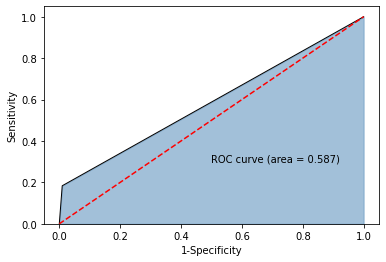

In [ ]:
# Draw ROC curve
# Calculate the probability of losing users, which is used to generate ROC curve data
y_score = dt.predict_proba(X_test)[:,1] 
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)

# Calculate the value of AUC
roc_auc = metrics.auc(fpr,tpr)
# Draw area chart
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr, tpr, color='black', lw = 1)
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
plt.text(0.5,0.3,'ROC curve (area = %0.3f)' % roc_auc)
plt.xlabel('1-Specificity') 
plt.ylabel('Sensitivity')
plt.show()

As shown in the figure above, the area under the ROC curve is 0.597, and the value of AUC is less than 0.8, so the model is considered unreasonable. (Usually take AUC and
0.8 comparison, if it is greater than 0.8, the model is considered reasonable). Next, use the SMOTE algorithm to process the data

In [ ]:
# Balance the training data set
over_samples = SMOTE(random_state=1234) 
over_samples_X,over_samples_y = over_samples.fit_resample(X_train, y_train)

# Proportion of categories before resampling
print("")
print(y_train.value_counts()/len(y_train))
# Proportion of categories after resampling
print(pd.Series(over_samples_y).value_counts()/len(over_samples_y))


0    0.98691
1    0.01309
Name: transactionRevenue, dtype: float64
1    0.5
0    0.5
Name: transactionRevenue, dtype: float64


In [ ]:
# Rebuild the decision tree model based on balanced data
dt2 = tree.DecisionTreeClassifier() 
dt2.fit(over_samples_X,over_samples_y)
# Model prediction on the test set
pred2 =dt2.predict(np.array(X_test))

# Model's prediction accuracy
print(metrics.accuracy_score(y_test, pred2))
# Model evaluation report
print(metrics.classification_report(y_test, pred2))

0.9810490693739424
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2906
           1       0.41      0.35      0.38        49

    accuracy                           0.98      2955
   macro avg       0.70      0.67      0.68      2955
weighted avg       0.98      0.98      0.98      2955



So we found that if we have used the sampling method, this problem cannot be solved very well, so we decided to use the method of increasing the penalty weight.

In [ ]:
#Use SVM weight adjustment to deal with unbalanced samples
from sklearn.svm import SVC 
 
model_svm=SVC(class_weight='balanced', kernel = 'linear')  #Create SVC object and specify category weight
model_svm.fit(X_train,y_train)

SVC(class_weight='balanced', kernel='linear')

In [ ]:
# Model prediction on the test set
pred2 =model_svm.predict(np.array(X_test))

# Model's prediction accuracy
print(metrics.accuracy_score(y_test, pred2))
# Model evaluation report
print(metrics.classification_report(y_test, pred2))

0.9472081218274112
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2906
           1       0.21      0.82      0.34        49

    accuracy                           0.95      2955
   macro avg       0.61      0.88      0.66      2955
weighted avg       0.98      0.95      0.96      2955



We can see that there is no problem with the recall of the two categories



Feature importance

In [ ]:
pd.Series(abs(model_svm.coef_[0]), index=predictors).nlargest(50)

networkDomain_spectrumnet.us                   3.668738
country_United States                          3.175961
networkDomain_directmusicservice.com           3.049691
networkDomain_fusionbroadband.com              2.239277
networkDomain_(not set)                        2.196466
networkDomain_zoominternet.net                 2.050820
country_Canada                                 2.048799
networkDomain_cableone.net                     1.956220
source_mall.googleplex.com                     1.837251
campaign_AW - Dynamic Search Ads Whole Site    1.701234
city_Santa Clara                               1.691986
campaign_AW - Accessories                      1.568682
region_Texas                                   1.519895
deviceCategory_tablet                          1.519895
region_Zurich                                  1.488786
city_Zurich                                    1.488786
browser_Internet Explorer                      1.459076
networkDomain_suddenlink.net                   1

In [ ]:
newnewfeature=list(pd.Series(abs(model_svm.coef_[0]), index=predictors).index)

In [ ]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(data[newnewfeature], newdata.transactionRevenue, random_state=12)
from sklearn.svm import SVC 

model_svm=SVC(class_weight='balanced', kernel = 'linear')  
model_svm.fit(X_train,y_train)

SVC(class_weight='balanced', kernel='linear')

In [ ]:
pred2 =model_svm.predict(np.array(X_test))

print(metrics.accuracy_score(y_test, pred2))
print(metrics.classification_report(y_test, pred2))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



0.9472081218274112
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2906
           1       0.21      0.82      0.34        49

    accuracy                           0.95      2955
   macro avg       0.61      0.88      0.66      2955
weighted avg       0.98      0.95      0.96      2955



So the performance of our model is : recall 0.95 for no revenue;0.82 for have revenue

XGBOOST

In [ ]:
scale_pos_weight = round(len(newdata[newdata.transactionRevenue==0]) / len(newdata[newdata.transactionRevenue==1]), 2)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(data[predictors], newdata.transactionRevenue, random_state=12)

model_xgb_class = XGBClassifier(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,early_stopping_rounds=5,
                             min_child_weight=1, n_estimators=500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1,scale_pos_weight=scale_pos_weight)
model_xgb_class.fit(X_train, y_train)
preds=model_xgb_class.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test, preds))
print(metrics.classification_report(y_test, preds))

0.9631133671742809
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2906
           1       0.28      0.78      0.41        49

    accuracy                           0.96      2955
   macro avg       0.64      0.87      0.70      2955
weighted avg       0.98      0.96      0.97      2955



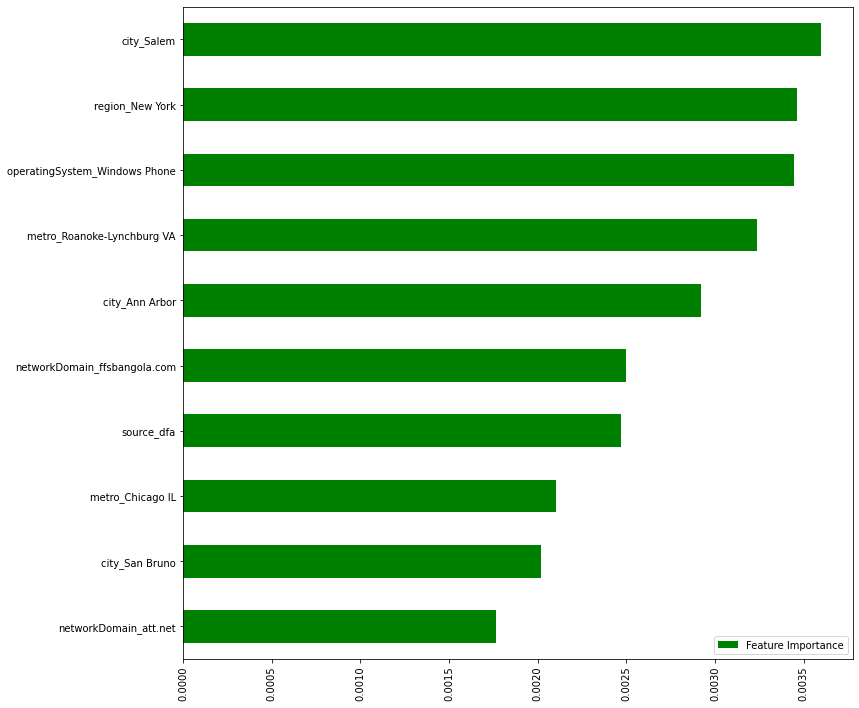

In [ ]:
model_xgb_class.feature_importances_
Feature_importance=pd.DataFrame()
Feature_importance["Feature Importance"]=model_xgb_class.feature_importances_
Feature_importance.index=X_train.columns
Feature_importance[Feature_importance["Feature Importance"] !=0 ].sort_values("Feature Importance").head(10).plot(kind="barh",figsize=(12,12), color='g')
plt.xticks(rotation=90)
plt.show()

In [ ]:
choose_cols =Feature_importance[Feature_importance["Feature Importance"] >0 ].index.tolist()
choose_cols.append("transactionRevenue")
choose_data = newdata[choose_cols].copy()
y=choose_data.transactionRevenue
X=choose_data.drop(["transactionRevenue"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model_xgb_class2 = XGBClassifier(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,early_stopping_rounds=5,
                             min_child_weight=1, n_estimators=500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1,scale_pos_weight=scale_pos_weight)
model_xgb_class2.fit(x_train, y_train)
preds=model_xgb_class2.predict(x_test)


In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, preds))
print(metrics.classification_report(y_test, preds))

0.9644670050761421
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3495
           1       0.27      0.86      0.41        51

    accuracy                           0.96      3546
   macro avg       0.63      0.91      0.70      3546
weighted avg       0.99      0.96      0.97      3546



It performance better than before.

### Regression

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



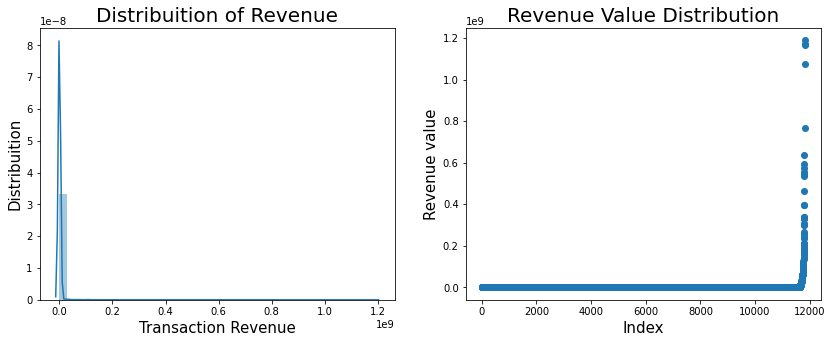

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.distplot(regression_data[regression_data['transactionRevenue'] >= 0]["transactionRevenue"], bins=40, kde=True)
ax.set_xlabel('Transaction Revenue', fontsize=15) #seting the xlabel and size of font
ax.set_ylabel('Distribuition', fontsize=15) #seting the ylabel and size of font
ax.set_title("Distribuition of Revenue", fontsize=20) #seting the title and size of font

# setting the second plot of our grid of graphs
plt.subplot(1,2,2)
# ordering the total of users and seting the values of transactions to understanding 
plt.scatter(range(data.shape[0]), np.sort(regression_data['transactionRevenue'].values))
plt.xlabel('Index', fontsize=15) # xlabel and size of words
plt.ylabel('Revenue value', fontsize=15) # ylabel and size of words
plt.title("Revenue Value Distribution", fontsize=20) # Setting Title and fontsize

plt.show()

We can find that it isn't the normal distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



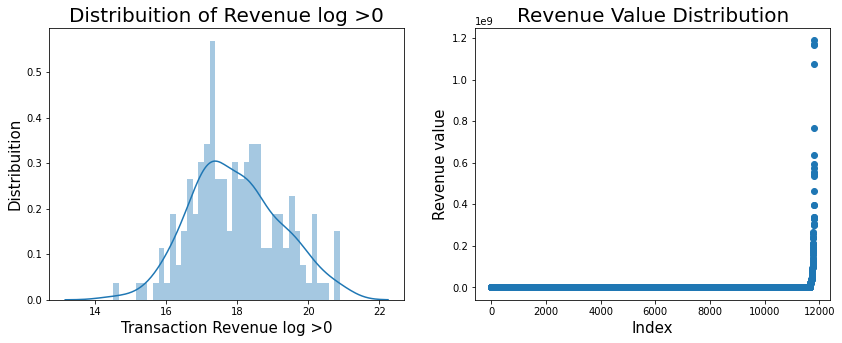

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.distplot(np.log(regression_data[regression_data['transactionRevenue'] > 0]["transactionRevenue"]+1), bins=40, kde=True)
ax.set_xlabel('Transaction Revenue log >0', fontsize=15) #seting the xlabel and size of font
ax.set_ylabel('Distribuition', fontsize=15) #seting the ylabel and size of font
ax.set_title("Distribuition of Revenue log >0", fontsize=20) #seting the title and size of font

# setting the second plot of our grid of graphs
plt.subplot(1,2,2)
# ordering the total of users and seting the values of transactions to understanding 
plt.scatter(range(data.shape[0]), np.sort(regression_data['transactionRevenue'].values))
plt.xlabel('Index', fontsize=15) # xlabel and size of words
plt.ylabel('Revenue value', fontsize=15) # ylabel and size of words
plt.title("Revenue Value Distribution", fontsize=20) # Setting Title and fontsize

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = model_selection.train_test_split(regression_data[newnewfeature], np.log(regression_data["transactionRevenue"]+1),test_size=0.30, random_state=12)


In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
model_xgb.fit(X_train, y_train)

XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
             min_child_weight=1.7817, n_estimators=2200, nthread=-1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571, silent=1,
             subsample=0.5213)

In [ ]:
preds=model_xgb.predict(X_test)
from sklearn import metrics
metrics.r2_score(y_test,preds)

0.19397796554816982

We can find that,in cause of the data,the score of the function is not very well.R2 score is far from 1


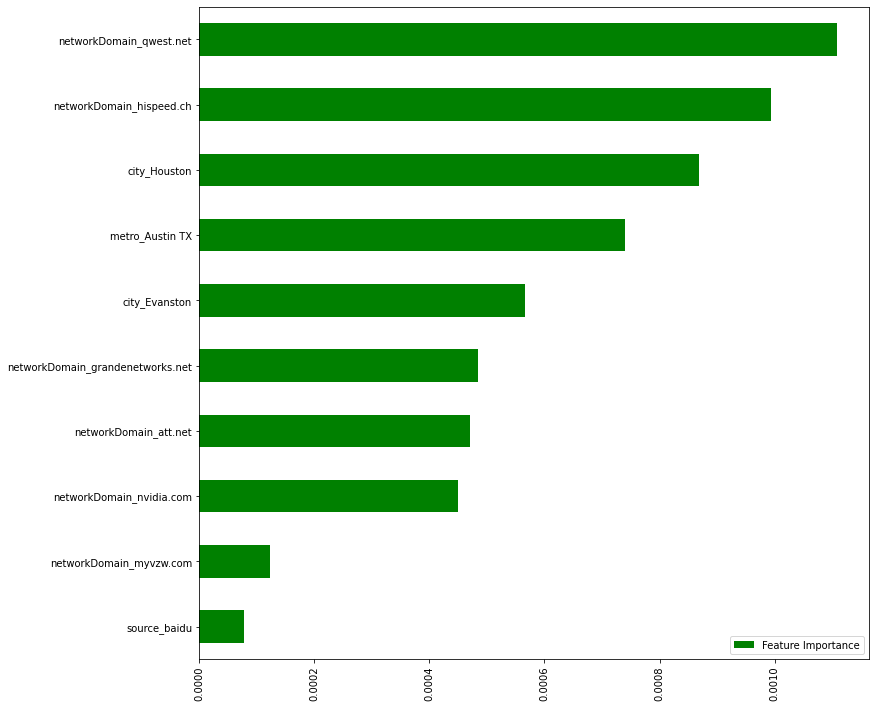

In [ ]:
model_xgb.feature_importances_
Feature_importance=pd.DataFrame()
Feature_importance["Feature Importance"]=model_xgb.feature_importances_
Feature_importance.index=X_train.columns
Feature_importance[Feature_importance["Feature Importance"] !=0 ].sort_values("Feature Importance").head(10).plot(kind="barh",figsize=(12,12), color='g')
plt.xticks(rotation=90)
plt.show()

In [ ]:
choose_cols =Feature_importance[Feature_importance["Feature Importance"] >0 ].index.tolist()
choose_cols.append("transactionRevenue")
choose_data = regression_data[choose_cols].copy()
y=choose_data.transactionRevenue
X=choose_data.drop(["transactionRevenue"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, np.log(y+1), test_size=0.30, random_state=42)

model_xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(x_train, y_train)
preds=model_xgb.predict(x_test)
from sklearn import metrics
metrics.r2_score(y_test,preds)

0.19958136204446453

We can find that,in cause of the data,the score of the function is not very well.R2 score is far from 1，but it seems better than before


In [ ]:
'''from  sklearn.model_selection import GridSearchCV
param_test1={
    'max_depth':range(3,8,2),
    "min_child_weight":range(1,4,2)
}
gsearch1=GridSearchCV(estimator=XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, 
                             n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1),param_grid=param_test1,scoring="r2",cv=5)
gsearch1.fit(x_train,y_train)
gsearch1.cv_results_
gsearch1.best_params_
gsearch1.best_score_
'''

'from  sklearn.model_selection import GridSearchCV\nparam_test1={\n    \'max_depth\':range(3,8,2),\n    "min_child_weight":range(1,4,2)\n}\ngsearch1=GridSearchCV(estimator=XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,\n                             learning_rate=0.05, \n                             n_estimators=2200,\n                             reg_alpha=0.4640, reg_lambda=0.8571,\n                             subsample=0.5213, silent=1,\n                             random_state =7, nthread = -1),param_grid=param_test1,scoring="r2",cv=5)\ngsearch1.fit(x_train,y_train)\ngsearch1.cv_results_\ngsearch1.best_params_\ngsearch1.best_score_\n'

Lasso

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X_train,X_test,y_train,y_test = model_selection.train_test_split(regression_data[newnewfeature], np.log(regression_data["transactionRevenue"]+1),test_size=0.30, random_state=12)

lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
preds=lasso.predict(X_test)
from sklearn import metrics
metrics.r2_score(y_test,preds)


0.19350336532980583

In [ ]:
lasso.coef_

array([-0.00058199, -0.04708458,  0.15638691, ...,  0.        ,
        0.        , -0.00041915])

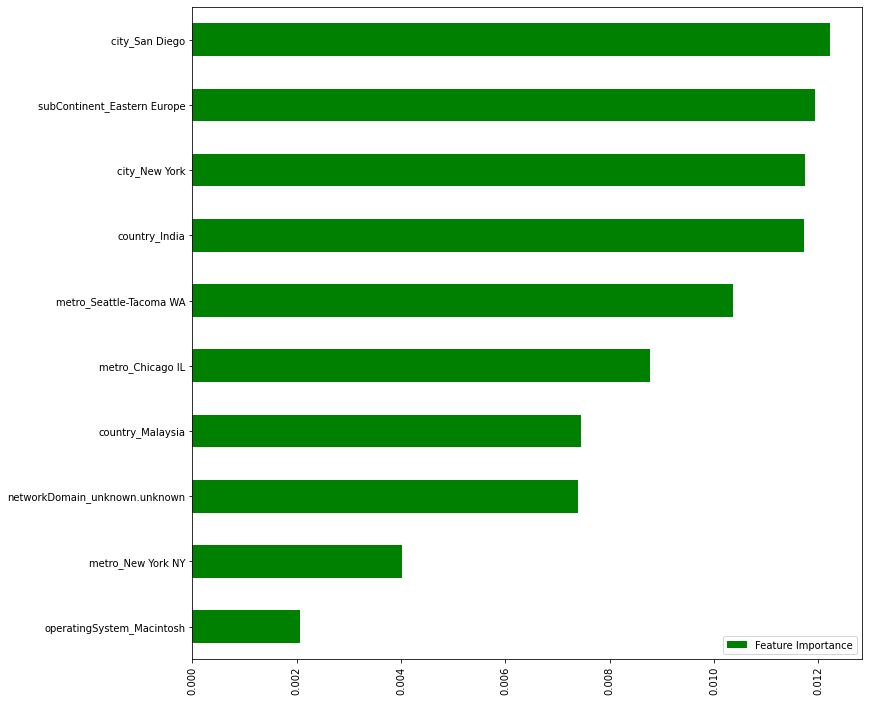

In [ ]:
Feature_importance=pd.DataFrame()
Feature_importance["Feature Importance"]=lasso.coef_
Feature_importance.index=X_train.columns
Feature_importance[Feature_importance["Feature Importance"] >0 ].sort_values("Feature Importance").head(10).plot(kind="barh",figsize=(12,12), color='g')
plt.xticks(rotation=90)
plt.show()

In [ ]:
choose_cols =Feature_importance[Feature_importance["Feature Importance"] >0 ].index.tolist()
choose_cols.append("transactionRevenue")
choose_data = regression_data[choose_cols].copy()
y=choose_data.transactionRevenue
X=choose_data.drop(["transactionRevenue"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, np.log(y+1), test_size=0.30, random_state=42)

lasso = linear_model.Lasso(alpha=0.001)

lasso.fit(x_train, y_train)
preds=lasso.predict(x_test)
from sklearn import metrics
metrics.r2_score(y_test,preds)

0.23772280367381293

In [ ]:
len(regression_data[regression_data.transactionRevenue>0])

165

So we decided to supprime some data with zero,but therethere is only 165 transaction >0.
